# Import Library

In [1]:
import tensorflow as tf # Mengimpor library TensorFlow, yang digunakan untuk membuat, melatih, dan menggunakan model machine learning.
import matplotlib.pyplot as plt # Mengimpor library Matplotlib untuk visualisasi data.
import numpy as np# Mengimpor library NumPy, yang digunakan untuk manipulasi array dan matematika numerik.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import dataset from kaggle

In [2]:
from google.colab import files # Mengupload file kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdaffaalfikri","key":"499ff35e5f720a12c65a4a0dbe755e11"}'}

In [3]:
!mkdir -p ~/.kaggle # Mendeteksi apakah file sudah benar benar di upload
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d karimabdulnabi/fruit-classification10-class # Mengunduh dataset dari Kaggle

Dataset URL: https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class
License(s): CC0-1.0
 96% 28.0M/29.2M [00:00<00:00, 67.6MB/s]
100% 29.2M/29.2M [00:00<00:00, 60.3MB/s]


In [5]:
!mkdir buah # Membuat direktori folder baru bernama (buah)
!unzip fruit-classification10-class.zip -d buah # Melakukan ekstraksi pada file zip
!ls buah # Melihat isi folder buah

Archive:  fruit-classification10-class.zip
  inflating: buah/MY_data/predict/0.jpeg  
  inflating: buah/MY_data/predict/00.jpeg  
  inflating: buah/MY_data/predict/011.jpeg  
  inflating: buah/MY_data/predict/012.jpeg  
  inflating: buah/MY_data/predict/0122.jpeg  
  inflating: buah/MY_data/predict/0124.jpeg  
  inflating: buah/MY_data/predict/023.jpeg  
  inflating: buah/MY_data/predict/1.jpeg  
  inflating: buah/MY_data/predict/147.jpeg  
  inflating: buah/MY_data/predict/2.jpeg  
  inflating: buah/MY_data/predict/202.jpeg  
  inflating: buah/MY_data/predict/22.jpeg  
  inflating: buah/MY_data/predict/3.jpeg  
  inflating: buah/MY_data/predict/321.jpeg  
  inflating: buah/MY_data/predict/33.jpeg  
  inflating: buah/MY_data/predict/365.jpeg  
  inflating: buah/MY_data/predict/4.jpeg  
  inflating: buah/MY_data/predict/41.jpeg  
  inflating: buah/MY_data/predict/65.jpeg  
  inflating: buah/MY_data/predict/659.jpeg  
  inflating: buah/MY_data/predict/66.jpeg  
  inflating: buah/MY_data/

# Data Preprocessing

In [6]:
img_height, img_width = 32, 32 # Mengatur tinggi dan lebar gambar
batch_size = 20 # Mengatur ukuran batch data

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/buah/MY_data/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
) # Membuat dataset dari direktori gambar
# Semua gambar akan diubah ukurannya menjadi 32x32.
#Dataset akan diproses dalam batch berisi 20 gambar.

Found 1025 files belonging to 10 classes.


In [7]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_ds = datagen.flow_from_directory(
    "/content/buah/MY_data/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset='training'
)

Found 822 images belonging to 10 classes.


In [8]:
train_ds = datagen.flow_from_directory(
    "/content/buah/MY_data/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset='training'
)

Found 822 images belonging to 10 classes.


In [9]:
val_ds = datagen.flow_from_directory(
    "/content/buah/MY_data/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset='validation'
)

Found 203 images belonging to 10 classes.


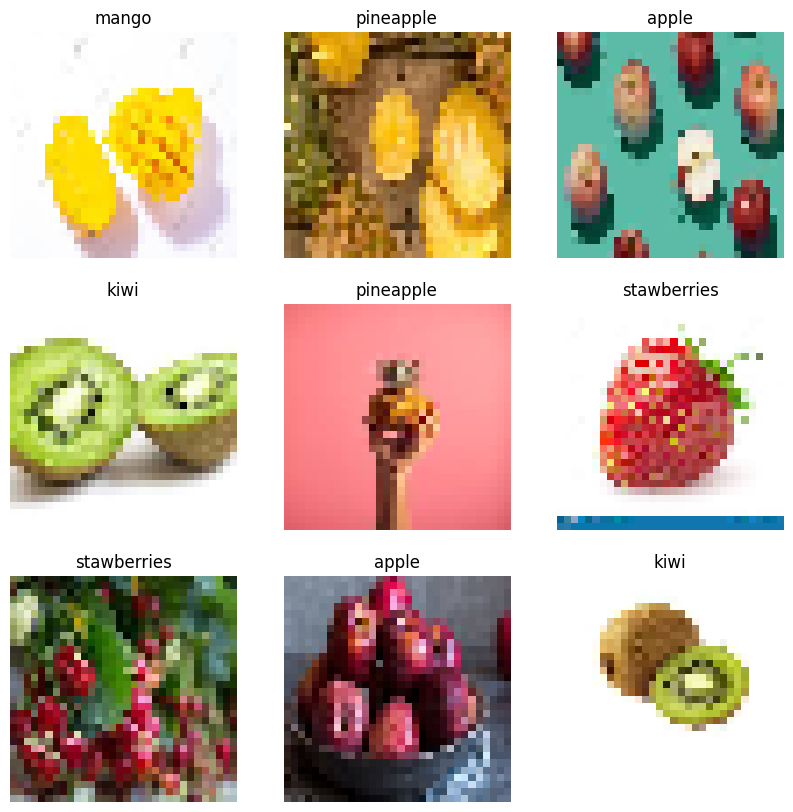

In [10]:
class_names = ["apple", "avocado", "banana", "cherry", "kiwi", "mango", "orange", "pineapple", "stawberries", "watermelon"]

plt.figure(figsize=(10, 10))
images, labels = next(train_ds)  # Jika gambar dinormalisasi ke [0, 1], skalakan kembali ke [0, 255]
if images.max() <= 1.0:
    images = (images * 255).astype("uint8")
labels = labels.astype(int)

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])  # Menampilkan gambar
    plt.title(class_names[labels[i]])  # Menampilkan nama kelas
    plt.axis("off")  # Menghilangkan sumbu

plt.show()


# Modeling

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")  # Jumlah output sesuai dengan jumlah kelas
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.0970 - loss: 2.3513 - val_accuracy: 0.2512 - val_loss: 2.2276
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1878 - loss: 2.1180 - val_accuracy: 0.2759 - val_loss: 1.8861
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2970 - loss: 1.8131 - val_accuracy: 0.3350 - val_loss: 1.6736
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3234 - loss: 1.6967 - val_accuracy: 0.4089 - val_loss: 1.6086
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3660 - loss: 1.5987 - val_accuracy: 0.4089 - val_loss: 1.6171
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4075 - loss: 1.5942 - val_accuracy: 0.3892 - val_loss: 1.5912
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3892 - loss: 1.5870 - val_accuracy: 0.4581 - val_loss: 1.4726
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4148 - loss: 1.5101 - val_accuracy: 0.4532 - val_loss: 

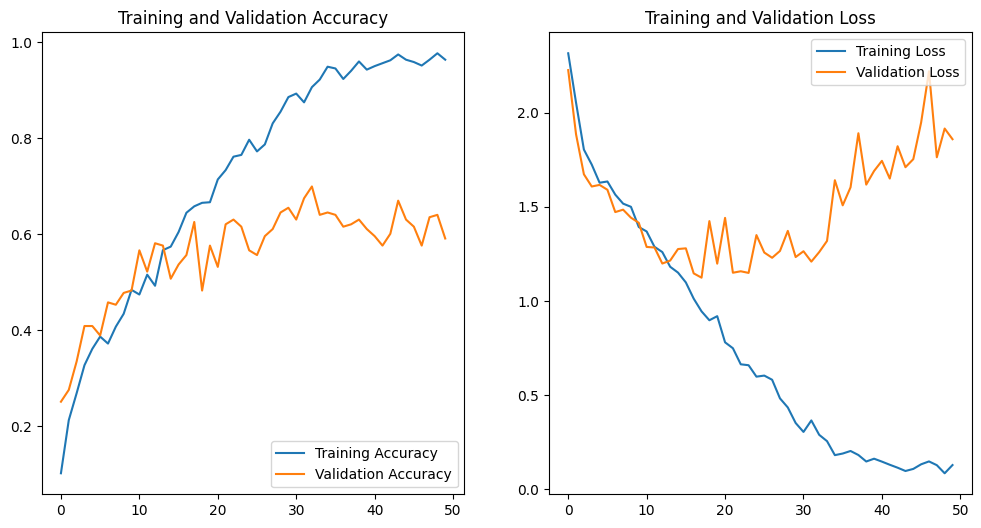

In [14]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


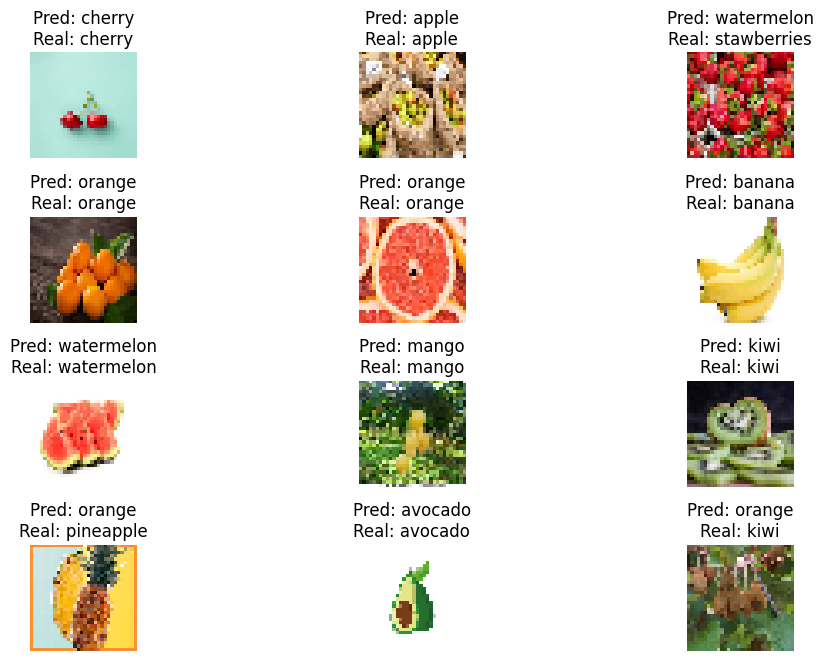

In [21]:
plt.figure(figsize=(10, 10))
images, labels = next(train_ds)

if images.max() <= 1.0:
    images = (images * 255).astype("uint8")

classifications = model.predict(images)
for i in range(12):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(images[i])
    index = np.argmax(classifications[i])
    plt.title(f"Pred: {class_names[index]}\nReal: {class_names[int(labels[i])]}")  # Menampilkan prediksi dan label
    plt.axis("off")  # Menghilangkan sumbu

plt.tight_layout()
plt.show()

In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpv8c2pckb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139052082335232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139052082331712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139052082125232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139052082586096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139052082588208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139052082586272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139052082586976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139052082588560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139052082587680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139052082590144: TensorSpec(shape=(), dtype=tf.resource, name=None)
